In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from functions.naming import rename_columns

# Load your dataset
# Assuming your data is stored in a CSV file named 'your_data.csv'
df = pd.read_excel("/Users/athanasioskaravangelis/Desktop/RSM BAM/Workshop/pko_forecasting/data/PKO_Initial_Dataset.xlsx")
#rename columns
df = rename_columns(df)
# select only the values after 2010-01-01
df['date'] = pd.to_datetime(df['date'], format='%b-%y')
df = df[df['date'] > '2009-12-02']
df = df[df['date'] < '2023-06-02']

# Check for missing values
missing_values = df.isnull().sum()

In [15]:
# drop soybean_oil_zlz2 and jet_fuel_us_usd_mt
df = df.drop(['soybean_oil_zlz2'], axis=1)
df = df.drop(['jet_fuel_us_usd_mt'], axis=1)
# Handle missing values (e.g., impute with mean)
df.fillna(df.mean(), inplace=True)

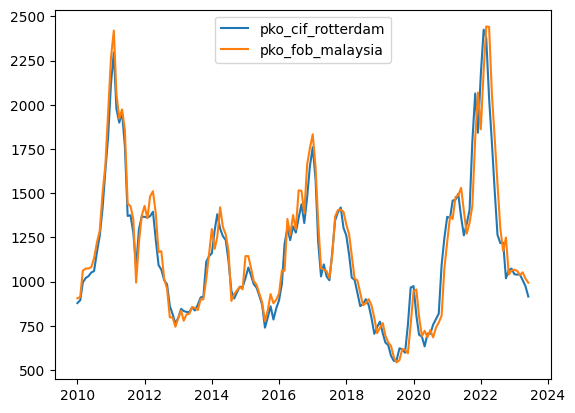

In [42]:
# plot pko_cif_rotterdam and pko_fob_malaysia
plt.plot(df.index, df['pko_cif_rotterdam'], label='pko_cif_rotterdam')
plt.plot(df.index, df['pko_fob_malaysia'], label='pko_fob_malaysia')
plt.legend()   
plt.show()

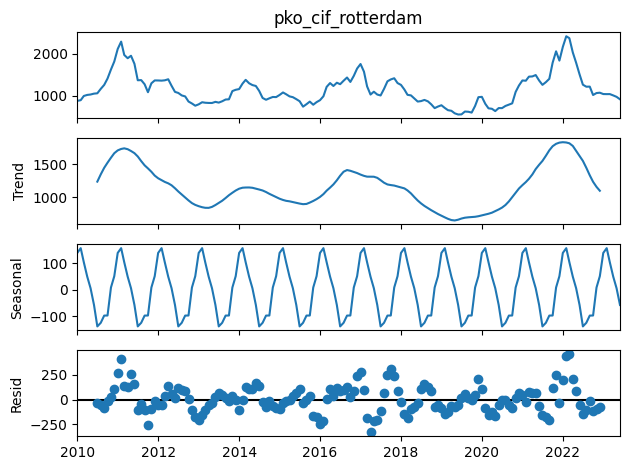

In [16]:
# Time Series Decomposition
date_col = 'date'  # Replace with the actual date column name
df[date_col] = pd.to_datetime(df[date_col])
df.set_index(date_col, inplace=True)

result = seasonal_decompose(df['pko_cif_rotterdam'], model='additive')
result.plot()
plt.show()

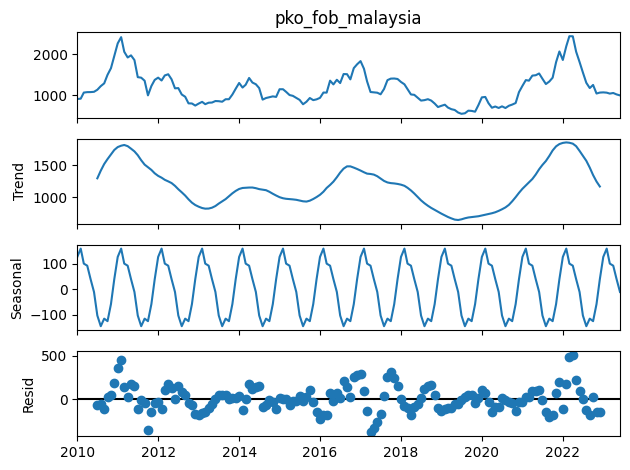

In [20]:
result = seasonal_decompose(df['pko_fob_malaysia'], model='additive')
result.plot()
plt.show()

In [38]:
# Feature Selection
X = df.drop(['pko_cif_rotterdam', 'pko_fob_malaysia', 'palm_olein_fob_malaysia', 'fatty_alcohol_c12_14_fob_asia',
             'palm_stearin_cif_rotterdam', 'palm_oil_cif_nwe', 'fatty_alcohol_c12_14_fd_nwe', 'fatty_alcohol_c16_18_fob_asia',
             'tallow_fob_us_gulf', 'jet_fuel_europe', 'jet_fuel_us'],axis=1)
y = df['pko_cif_rotterdam']

# Using Random Forest for feature importance
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

RandomForestRegressor()

In [39]:
# see results of feature importance
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

coconut_cif_rotterdam                 0.920491
ONI                                   0.009744
pko_monthly_stocks_malaysia           0.007282
pko_production_malaysia               0.007107
idr_usd_rate                          0.005113
myr_usd_rate                          0.004416
palm_oil_production_indonesia         0.003257
Precipitation_Indonesia               0.003247
bio_ethanol                           0.002664
Temperaturemax_Indonesia              0.002632
pko_domestic_consumption_indonesia    0.002401
Humidex_Malaysia                      0.002346
palm_oil_production_malaysia          0.002238
pko_monthly_stocks_indonesia          0.002203
palm_oil_harvest_area_malaysia        0.002148
Temperaturemin_Indonesia              0.002041
Precipitation_Malaysia                0.001829
pko_total_supply_malaysia             0.001799
pko_exports_malaysia                  0.001787
Temperaturemin_Malaysia               0.001735
pko_exports_indonesia                 0.001603
Temperaturema

In [40]:
# Select relevant features based on importance
sfm = SelectFromModel(rf_model, threshold=0.001)
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]

# Data Splitting
# Assuming you want to split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display results
print("Selected Features:", selected_features)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Selected Features: Index(['ONI', 'Precipitation_Indonesia', 'Precipitation_Malaysia',
       'Temperaturemin_Indonesia', 'Temperaturemin_Malaysia',
       'Temperaturemax_Indonesia', 'Temperaturemax_Malaysia',
       'Humidex_Indonesia', 'Humidex_Malaysia', 'coconut_cif_rotterdam',
       'bio_ethanol', 'myr_usd_rate', 'idr_usd_rate',
       'palm_oil_harvest_area_indonesia', 'palm_oil_production_indonesia',
       'palm_oil_harvest_area_malaysia', 'palm_oil_production_malaysia',
       'pko_production_malaysia', 'pko_monthly_stocks_indonesia',
       'pko_monthly_stocks_malaysia', 'pko_domestic_consumption_indonesia',
       'pko_domestic_consumption_malaysia', 'pko_exports_indonesia',
       'pko_exports_malaysia', 'pko_total_supply_malaysia', 'pmi_indonesia',
       'mspo_certification'],
      dtype='object')
Training set shape: (129, 39) (129,)
Testing set shape: (33, 39) (33,)
